In [58]:
import pickle
import pandas as pd
import numpy as np
import networkx as nx

In [59]:
def calculate_measures(df, measure, num_true_homographs):
    '''
    Calculates and adds columns precision_`measure`, recall_`measure`, f1_score_`measure` for the specific in the dataframe
    for each node.

    measure a string specifying the column to be used for scoring

    num_true_homographs is an integer specifying the number of true homographs 
    in the dataframe based on the ground truth 
    '''
    num_homographs_seen_so_far = 0
    precision_list = []
    recall_list = []
    f1_list = []

    # Sort the dataframe by the specified measure (high->low)
    df = df.sort_values(by=[measure], ascending=False)

    # Calculate top-k precision/recall/f1-scores in a running fashion (start from k=1 all the way to the largest possible k)
    for k, cur_node_is_homograph in zip(range(1, df.shape[0] + 1), df['is_homograph']):
        if cur_node_is_homograph:
            num_homographs_seen_so_far += 1
        
        precision_list.append(num_homographs_seen_so_far / k)
        recall_list.append(num_homographs_seen_so_far / num_true_homographs)

        f1_score = (2*precision_list[-1]*recall_list[-1]) / (precision_list[-1]+recall_list[-1])
        f1_list.append(f1_score)

    df.loc[:, measure+'_precision'] = precision_list
    df.loc[:, measure+'_recall'] = recall_list
    df.loc[:, measure+'_f1_score'] = f1_list

    # Remove NaN values from F1-score
    df[measure+'_f1_score'] = df[measure+'_f1_score'].fillna(value=0)
    return df

In [60]:
df_path = 'output/TUS_source_all_target_all/seed1/graph_stats_with_groundtruth_df.pickle'
graph_path = '../graph_construction/combined_graphs_output/TUS/bipartite/bipartite.graph'

df = pickle.load(open(df_path, 'rb'))
df = df[df['node_type'] == 'cell']
df

,node,node_type,approximate_betweenness_centrality,is_homograph,has_missing_key,katz,harmonic_closeness,pagerank
7,OGM Asia Pacific,cell,1.942699e-10,False,False,1.680663e-06,0.000345,0.000034
8,Asia,cell,1.599529e-06,True,False,3.644843e-06,0.071389,0.000033
9,Bangladesh,cell,3.227351e-07,True,False,4.332080e-06,0.076382,0.000009
10,OAD Asia Programming,cell,4.178874e-07,True,False,1.939680e-06,0.041393,0.000021
11,Individual,cell,0.000000e+00,False,False,1.966654e-06,0.084862,0.000023
...,...,...,...,...,...,...,...,...
200196,MRS,cell,4.039309e-14,False,False,9.133687e-07,0.092727,0.000002
200197,BEV,cell,4.039309e-14,False,False,9.133687e-07,0.092727,0.000002
200198,BUR,cell,4.039309e-14,False,False,9.133687e-07,0.092727,0.000002
200199,OTP,cell,4.039309e-14,False,False,9.133687e-07,0.092727,0.000002


In [61]:
num_true_homographs = df['is_homograph'].value_counts()[True]

measures = ['katz', 'harmonic_closeness', 'pagerank']

for measure in measures:
    df = calculate_measures(df, measure, num_true_homographs)
df


,node,node_type,approximate_betweenness_centrality,is_homograph,has_missing_key,katz,harmonic_closeness,pagerank,katz_precision,katz_recall,katz_f1_score,harmonic_closeness_precision,harmonic_closeness_recall,harmonic_closeness_f1_score,pagerank_precision,pagerank_recall,pagerank_f1_score
191365,,cell,1.338285e-04,True,False,4.912452e-05,0.096994,8.301010e-04,0.023275,0.005301,0.008635,0.412485,0.680968,0.513765,1.000000,0.000038,0.000077
191380,Medium,cell,1.502401e-08,True,False,1.004069e-05,0.068818,1.916829e-04,0.067383,0.231304,0.104363,0.224220,0.841175,0.354062,1.000000,0.000077,0.000154
191387,Coarse,cell,1.410845e-08,True,False,9.593390e-06,0.068745,1.818064e-04,0.068940,0.237296,0.106841,0.222469,0.841214,0.351880,1.000000,0.000115,0.000230
191382,Fine,cell,1.036315e-08,True,False,8.392645e-06,0.068548,1.550289e-04,0.075892,0.264375,0.117930,0.222477,0.841252,0.351893,1.000000,0.000154,0.000307
191391,Strong,cell,2.492179e-06,True,False,7.080913e-06,0.082054,1.301221e-04,0.158607,0.608335,0.251612,0.237492,0.746226,0.360312,1.000000,0.000192,0.000384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9883,WABUSH LAKE,cell,0.000000e+00,False,False,9.933524e-07,0.084747,1.318535e-06,0.142118,0.999770,0.248860,0.249432,0.729057,0.371695,0.136742,1.000000,0.240586
9889,OAK POINT,cell,0.000000e+00,False,False,9.933524e-07,0.084747,1.318535e-06,0.142115,0.999770,0.248855,0.249438,0.729057,0.371703,0.136741,1.000000,0.240585
42206,Spur Mile,cell,0.000000e+00,False,False,6.539917e-07,0.082976,1.158474e-06,0.136761,1.000000,0.240615,0.234746,0.731477,0.355428,0.136741,1.000000,0.240584
36852,Total Trains Daily,cell,0.000000e+00,False,False,6.582623e-07,0.085651,1.103969e-06,0.136761,1.000000,0.240616,0.252026,0.728635,0.374513,0.136740,1.000000,0.240583


In [64]:
# Compute F1-scores at num_homographs
for measure in measures:
    print('For', measure, 'at k =', num_true_homographs, 'the f1-score is:', df.iloc[num_true_homographs-1][measure+'_f1_score'])
df = df.sort_values(by=['approximate_betweenness_centrality'], ascending=False)
print('For BC at k =', num_true_homographs, 'the f1-score is:', df.iloc[num_true_homographs-1][measure+'_f1_score'])

For katz at k = 26035 the f1-score is: 0.24231486170522257
For harmonic_closeness at k = 26035 the f1-score is: 0.2176008593599088
For pagerank at k = 26035 the f1-score is: 0.6255809487228731
For BC at k = 26035 the f1-score is: 0.6550525267331941


<AxesSubplot:ylabel='Frequency'>

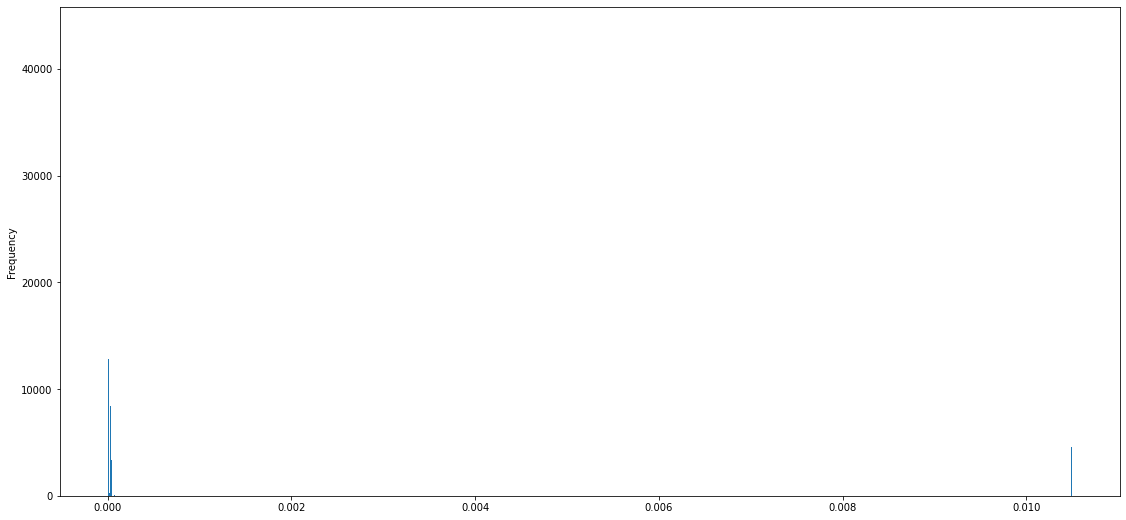

In [11]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (19,9)
df['katz'].plot.hist(bins=5000)
